In [44]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns



In [45]:
data=pd.read_csv('medal.csv',sep=',',header=0,encoding='latin')

In [46]:
data.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [47]:
data.columns

Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal'],
      dtype='object')

In [48]:

data.dtypes

City            object
Edition          int64
Sport           object
Discipline      object
Athlete         object
NOC             object
Gender          object
Event           object
Event_gender    object
Medal           object
dtype: object

In [49]:
data['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [50]:
data['City'].nunique()

22

In [51]:
data.rename(columns={'Edition':'Year'},inplace=True)
data.head()

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [52]:
data['Gender'].value_counts()

Men      21721
Women     7495
Name: Gender, dtype: int64

In [53]:
print('The Highest Decorated Male Athlete is: ',data[data['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',
      data[data['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Female Athlete is: ',data[data['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],
      'with: ',data[data['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  PHELPS, Michael with:  16  medals
The Highest Decorated Female Athlete is:  LATYNINA, Larisa with:  18  medals


### Athletes with Highest Medals by Medal-Type

In [54]:
medals=data.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
17259,"PHELPS, Michael",Gold,14
15618,"NEMOV, Alexei",Bronze,6
5060,"DITYATIN, Aleksandr",Silver,6


### Medal Distribution Of Top 10 Countries

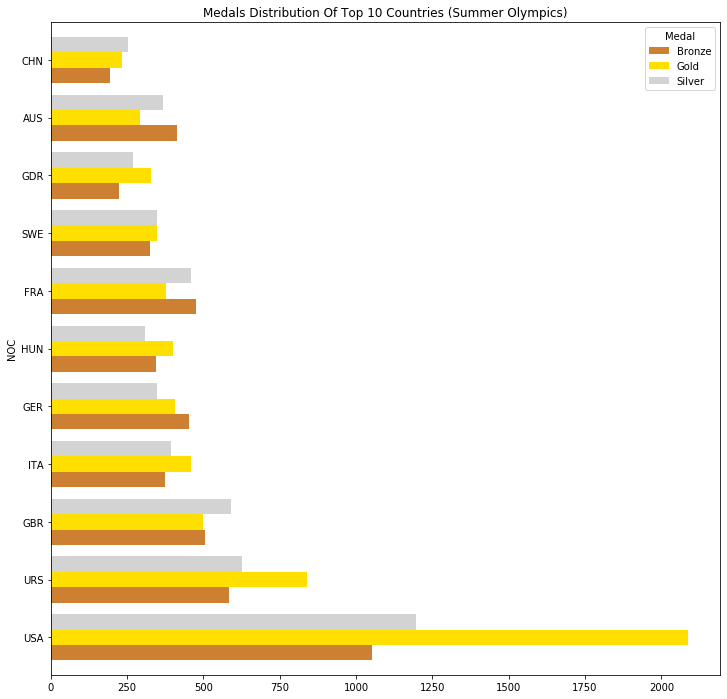

In [55]:
medals_country=data.groupby(['NOC','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('NOC','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

### Medals By Top Countries By Sport

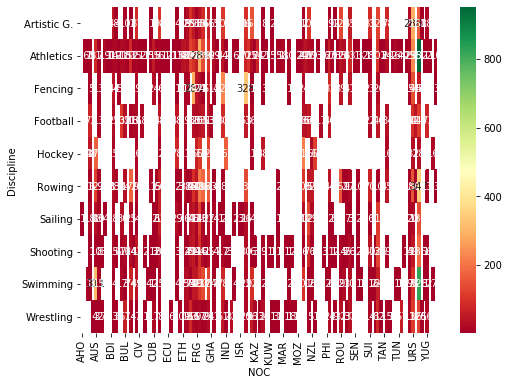

In [56]:
data.loc[data['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
data.loc[data['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'
test=data[data['NOC'].isin(data['NOC'].value_counts()[:10].index)]
test=data[data['Discipline'].isin(data['Discipline'].value_counts()[:10].index)]
test=test.groupby(['NOC','Discipline'])['Sport'].count().reset_index()
test=test.pivot('Discipline','NOC','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

### Event count by city

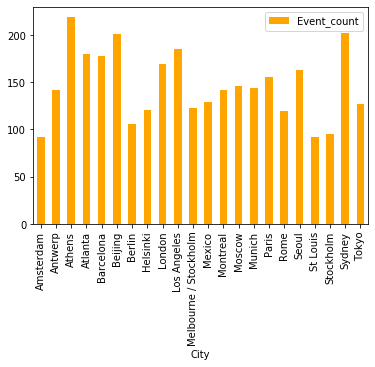

In [57]:
def f(x):
    return Series(dict(Event_count=x['Event'].nunique()
                      ))

k=data.groupby(data['City']).apply(f)

k.plot(kind='bar',color='orange')


### Athletes count by year

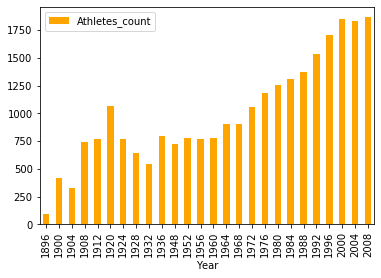

In [58]:
def f(x):
    return Series (dict(Athletes_count=x['Athlete'].nunique()
                       ))


k=data.groupby(data['Year']).apply(f)
k.plot(kind='bar',color='orange')

In [59]:
data.groupby(data['Year']).apply(f)

,Athletes_count
Year,
1896,94
1900,414
1904,324
1908,738
1912,770
1920,1064
1924,768
1928,643
1932,543


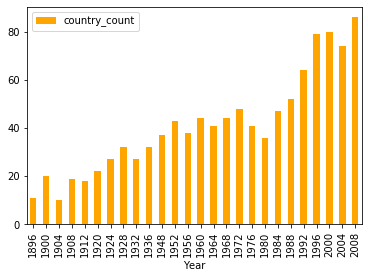

In [60]:
#participating countries

def f(x):
    return Series(dict(country_count=x['NOC'].nunique()
                      ))

k=data.groupby(data['Year']).apply(f)
k.plot(kind='bar',color='orange')

In [61]:
#game intro date
k=data[['Sport','Year']]
k=k.groupby(['Sport']).min().sort_values('Year',ascending=False)
k
                                         

,Year
Sport,
Taekwondo,2000
Triathlon,2000
Softball,1996
Badminton,1992
Baseball,1992
Table Tennis,1988
Volleyball,1964
Judo,1964
Canoe / Kayak,1936
